(nelin-rce)=
# Řešení nelineárních rovnic

V této kapitole si představíme několik algoritmů a metod na řešení jedné nebo soustavy nelineárních rovnic.

Oproti linearním rovnicím budeme vždy potřebovat **počátečný odhad** řešení, který budeme **iteračně zpřesňovat** určitou metodou.

U metod nás bude zajímat:
* *rychlost konvergence* - počet kroků potřebných k dosažený požadovené přesnosti
* *jistota konvergence* - jestli máme zajištěno, že metoda skončí v bodě, kde se nachází řešení a ne např. v lokálním extrému

## Řešení jedné rovnice

Pokud řešíme pouze jednu rovnici, lze snadno využít určité prioritní znalosti jak funkce vypadá, a omezit hledání řešení (kořenů) pouze na určitý interval.
Existuje řada jednoduchých metod, které umožňují nalézt řešení v zadaném intervalu. Řešíme úlohu:

- řešíme $f(x)=0$ 
- předpokládáme pěkné, spojité funkce
- obecný postup:
    1. ohraničení kořenů - určení intervalů, které obsahují *alespoň jeden* kořen
        * pokud pro $a<b$ platí, že $f(a)f(b)<0$, pak je v intervalu $(a,b)$ alespoň jeden kořen
    2. zpřesňování hodnoty kořene

In [341]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve, root_scalar

### Metoda půlení intervalu (bisekce)
- postup
    1. nechť je kořen leží v intervalu $(a_{0},b_{0})$, tedy platí $f(a_{0})f(b_{0})<0$
    2. vypočítáme $c_0 = (a_{0}+b_{0})/2$
    3. jeden krajní bod ponecháme, druhý posuneme do $c_0$, aby opět platilo $f(a_{1})f(b_{1})<0$
        - $a_1 = a_0$ a $b_1 = c_0$ nebo $a_1 = c_0$ a $b_1 = b_0$
    4. skončíme v momentě, kdy je relativní chyba menší než požadovaná
- po $n$-tém kroku je kořen omezený body $a_{n}$ a $b_{n}$
- nepřesnost určení kořene: $r_n(x)= \frac{\lvert b_{n}-a_{n}\rvert}{|c_n|}$, kde $c_n$ je odhad řešení v kroce $n$ a platí: $r_{n+1}=r_{n}/2$
- **vždy konverguje** (pokud interval obsahuje kořen)
- v blízkosti kořene pomalá

**Analýza funkce**

Uvažujeme funkci: $f(x) = 0.8 x^3 - 10 x + 20$

In [342]:
def f(x):
    return 0.8 * x**3 - 10*x + 20

# pocatecni body omezujici reseni
a0 = -6
b0 = 5

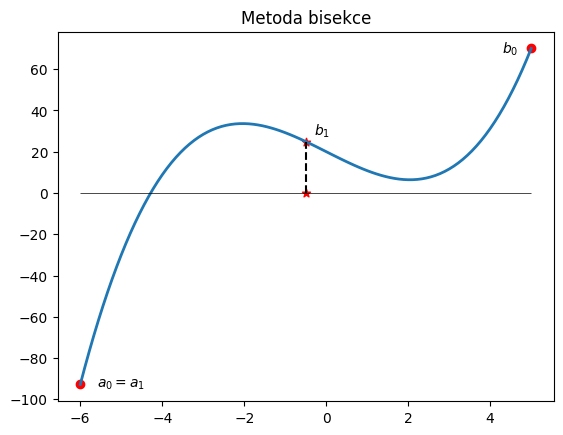

In [343]:
# vykresleni funkce
x = np.linspace(-6, 5, 100)
plt.plot(x, f(x), linewidth=2)
plt.hlines([0], colors=['k'], linewidths=[0.5], linestyles=['-'], xmin=-6, xmax=5)
plt.scatter([a0, b0], [f(a0), f(b0)], c='r')

# vizualizace kroku
plt.plot([(a0+b0)/2, (a0+b0)/2], [0, f((a0+b0)/2)], 'k--')
plt.scatter([(a0+b0)/2, (a0+b0)/2], [0, f((a0+b0)/2)], c='r', marker='*')
plt.text(4.3,68,'$b_0$')
plt.text(-5.6,-94,'$a_0=a_1$')
plt.text(-0.3,28,'$b_1$')
plt.title('Metoda bisekce');

**Algoritmus bisekce**

<div style="margin-top: 25px; margin-bottom: 25px; padding-top: 0px; padding-bottom: 0px; padding-left: 0px; padding-right: 0px; border-radius: 4px; border-color: #E0B32C; border-right-width: 1px; border-top-width: 1px; border-bottom-width: 1px; border-left-width: 3px; border-style: solid">
<div style="background: #FFF3CD; color: #000000; padding-left: 20px; padding-top: 10px; padding-bottom: 10px; border-radius: 1px 3px 0px 0px; font-weight: 600">Úkol</div>
<div style="padding-left: 20px; padding-right: 20px; padding-top: 0px; padding-bottom: 0px; border-radius: 0px 0px 3px 3px">
<p>

Implementujte metodu bisekce doplněním následujícího kódu.

Do pole `reseni` uložte vždy řešení a do pole `epsilon` odpovídající chybu v každé iteraci.
</p>
</div>
</div>

In [ ]:
eps = 1e-15        # pozadovana chyba
iteraci_max = 100  # max. iteraci
a = a0
b = b0

# budeme si prubezne ukladat odhad reseni a chybu odhadu
epsilon = np.ones(iteraci_max) # odhad relativni chyby, tedy delku intervalu <a,b> v jednotlivych krocich
reseni = np.zeros(iteraci_max) # aktualni odhad reseni

i = 0
## DOPLŇTE ##
while (i < iteraci_max and eps < epsilon[i-1]):
    c = (a + b) / 2
    if (f(a)*f(c) < 0):
        b = c
    else:
        a = c
    reseni[i] = (a + b) / 2
    epsilon[i] = np.abs((b - a) / (2*reseni[i]))
    i += 1

iteraci_end = i
koren = reseni[i-1] # odhad konecneho reseni
chyba = epsilon[i-1] # odhad konecne chyby

print(koren, iteraci_end, chyba)

-4.2822890178707524 51 5.185184932600293e-16


Porovnání s výsledkem funkce `root_scalar()` z knihovny SciPy, která umí metodu bisekce:

In [345]:
koren_SP = root_scalar(f, bracket=[a0, b0], method="bisect", rtol=1e-15).root

In [346]:
print(koren, f(koren), chyba)
print(koren_SP, f(koren_SP))  # srovnání s funkcí z knihovny SciPy

-4.2822890178707524 -2.1316282072803006e-14 5.185184932600293e-16
-4.282289017871449 -2.3703705664956942e-11


**Vizualizace nalezeného kořenu**

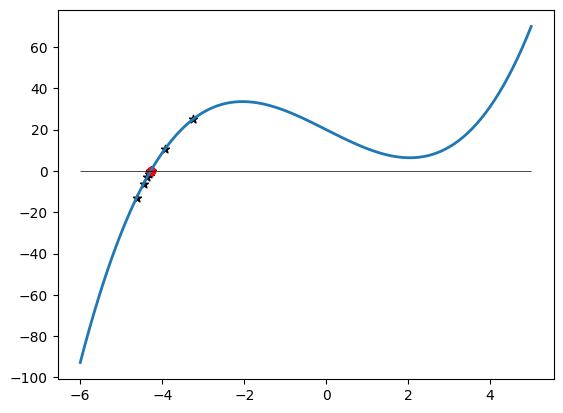

In [347]:
# vykresleni reseni
x = np.linspace(-6, 5, 100)
plt.plot(x, f(x), linewidth=2)
plt.hlines([0], colors=['k'], linewidths=[0.5], linestyles=['-'], xmin=-6, xmax=5)
plt.scatter(reseni[:iteraci_end], f(reseni[:iteraci_end]), c='k', marker='*')
plt.scatter(koren, f(koren), c='r');

**Analýza konvergence**

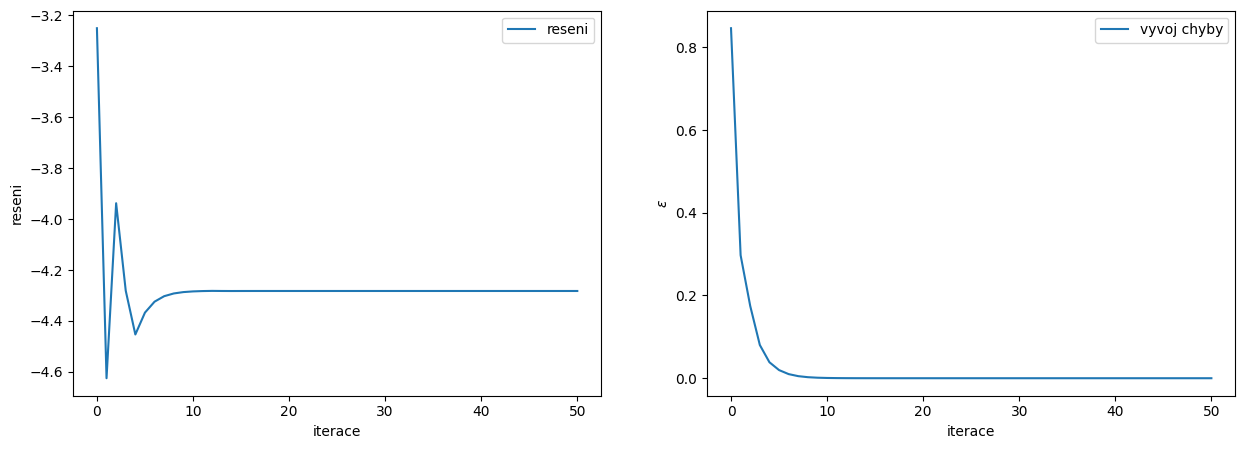

In [348]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

# zobrazime vyvoj reseni v zavislosti na iteracich
ax[0].plot(range(iteraci_end),reseni[:iteraci_end],label='reseni')
ax[0].set_ylabel('reseni')
ax[0].set_xlabel('iterace')
ax[0].legend()

# zobrazime vyvoj chyby v zavislosti na iteracich
ax[1].plot(range(iteraci_end),epsilon[:iteraci_end],label='vyvoj chyby')
ax[1].set_ylabel(r'$\epsilon$')
ax[1].set_xlabel('iterace')
#ax[1].set_yscale('log')
ax[1].legend();

### Metoda sečen
- postup
    1. mějme body $a_{n-1}$ a $a_{n}$
    2. zvolíme $a_{n+1}$ v průsečíku spojnice bodů $\left(a_{n-1},y(a_{n-1})\right)$ a $\left(a_{n},y(a_{n})\right)$ s osou $x$:
    
    $$
    a_{n+1} = \frac{a_{n-1} f(a_{n}) - a_{n} f(a_{n-1})}{f(a_{n}) - f(a_{n-1})}
    $$

- konvergence **není zaručena**

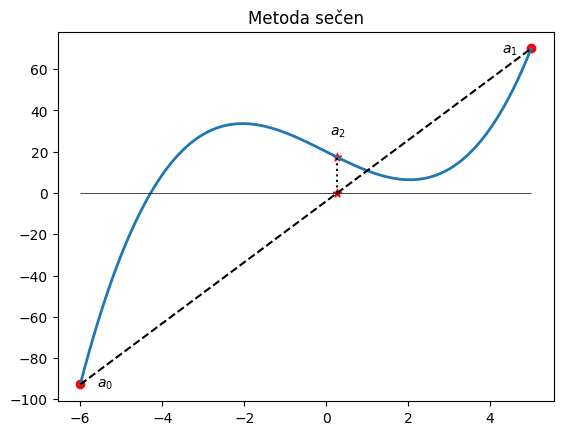

In [349]:
# vykresleni funkce
x = np.linspace(-6, 5, 100)
plt.plot(x, f(x), linewidth=2)
plt.hlines([0], colors=['k'], linewidths=[0.5], linestyles=['-'], xmin=-6, xmax=5)
plt.scatter([a0, b0], [f(a0), f(b0)], c='r')

# vizualizace kroku
c = (a0*f(b0)-f(a0)*b0) / (f(b0)-f(a0))
plt.plot([a0, b0], [f(a0), f(b0)], 'k--')
plt.plot([c, c], [0, f(c)], 'k:')
plt.scatter([c, c], [0, f(c)], c='r', marker='*')
plt.text(4.3,68,'$a_1$')
plt.text(-5.6,-94,'$a_0$')
plt.text(0.1,28,'$a_2$')
plt.title('Metoda sečen');

**Algoritmus metody sečen**

<div style="margin-top: 25px; margin-bottom: 25px; padding-top: 0px; padding-bottom: 0px; padding-left: 0px; padding-right: 0px; border-radius: 4px; border-color: #E0B32C; border-right-width: 1px; border-top-width: 1px; border-bottom-width: 1px; border-left-width: 3px; border-style: solid">
<div style="background: #FFF3CD; color: #000000; padding-left: 20px; padding-top: 10px; padding-bottom: 10px; border-radius: 1px 3px 0px 0px; font-weight: 600">Úkol</div>
<div style="padding-left: 20px; padding-right: 20px; padding-top: 0px; padding-bottom: 0px; border-radius: 0px 0px 3px 3px">
<p>

Implementujte metodu sečen doplněním následujícího kódu. Je možné, že metoda nebude konvergovat! Pak je potřeba změnit počáteční interval. Pro jaké hodnoty $a_0$ a $b_0$ metoda konverguje?

Do pole `reseni2` uložte vždy řešení a do pole `epsilon2` odpovídající chybu v každé iteraci.
</p>
</div>
</div>

In [ ]:
eps2 = 1e-15
iteraci_max2 = 100

a = 0.1 # ZKUSIT -6, 0.1
a1 = 5

# budeme si prubezne ukladat odhad reseni a chybu odhadu
epsilon2 = np.ones(iteraci_max2) # odhad relativni chyby, tedy delku intervalu <a,b> v jednotlivych krocich
reseni2 = np.zeros(iteraci_max2) # aktualni odhad reseni

i = 0
## DOPLŇTE ##
while (i < iteraci_max2 and eps2 < epsilon2[i-1]):
    a2 = (a*f(a1) - f(a)*a1) / (f(a1)-f(a))
    a = a1
    a1 = a2
    reseni2[i] = a2
    epsilon2[i] = np.abs((a - a1) / reseni2[i])
    
    i += 1

iteraci_end2 = i
koren2 = reseni2[i-1] # odhad konecneho reseni
chyba2 = epsilon2[i-1] # odhad konecne chyby

print(koren2, iteraci_end2, chyba2)

-4.282289017870752 14 8.29629589216047e-16


Porovnání s metodou bisekce:

In [351]:
print('Bisekce:', koren, f(koren), chyba)  # predchozi vysledek
print('Sečna:  ', koren2, f(koren2), chyba2)

Bisekce: -4.2822890178707524 -2.1316282072803006e-14 5.185184932600293e-16
Sečna:   -4.282289017870752 7.105427357601002e-15 8.29629589216047e-16


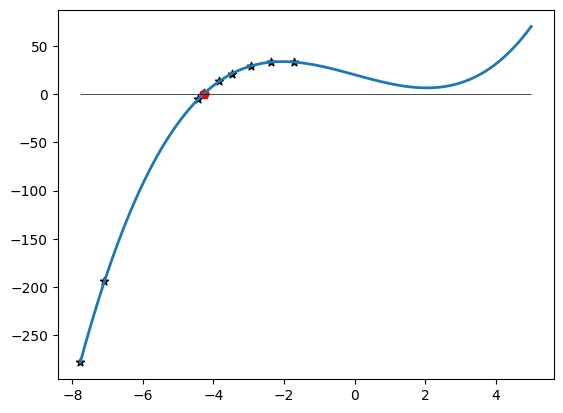

In [352]:
# vykresleni reseni
xmin = np.min([-6, np.min(reseni2[:iteraci_end2])])
xmax = np.max([5, np.max(reseni2[:iteraci_end2])])

x = np.linspace(xmin, xmax, 100)
plt.plot(x, f(x), linewidth=2)
plt.hlines([0], colors=['k'], linewidths=[0.5], linestyles=['-'], xmin=xmin, xmax=xmax)
plt.scatter(reseni2[:iteraci_end2], f(reseni2[:iteraci_end2]), c='k', marker='*')
plt.scatter(koren2, f(koren2), c='r');

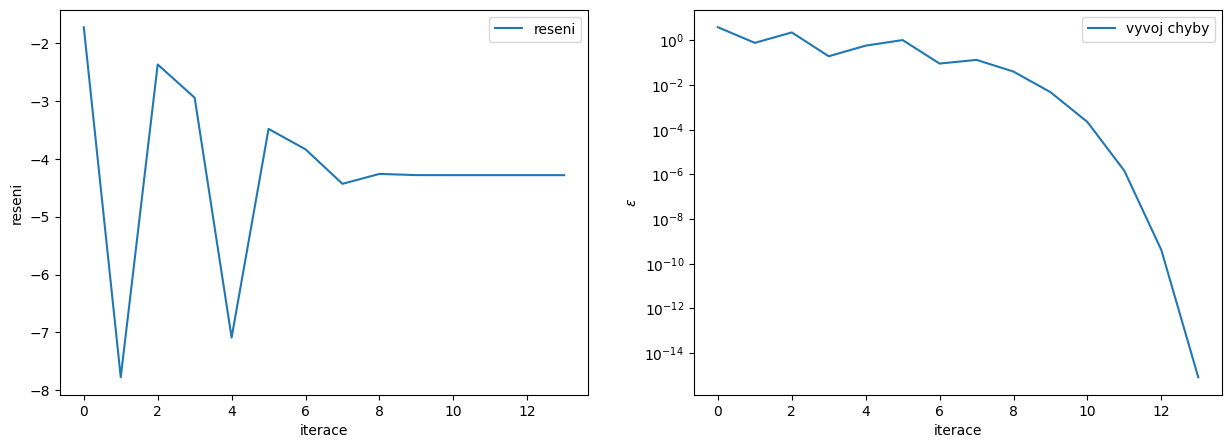

In [353]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

# zobrazime vyvoj reseni v zavislosti na iteracich
ax[0].plot(range(iteraci_end2),reseni2[:iteraci_end2],label='reseni')
ax[0].set_ylabel('reseni')
ax[0].set_xlabel('iterace')
ax[0].legend()

# zobrazime vyvoj chyby v zavislosti na iteracich
ax[1].plot(range(iteraci_end2),epsilon2[:iteraci_end2],label='vyvoj chyby')
ax[1].set_ylabel(r'$\epsilon$')
ax[1].set_xlabel('iterace')
ax[1].set_yscale('log')
ax[1].legend();

### Metoda regula falsi
- modifikace Metody sečen
- po určení $a_{n+1}$ si k němu vyberu z $a_{n-1}$ a $a_{n}$ takový bod $a_{n}$, aby kořen zůstal ohraničený, tj. $f(a_{n})f(a_{n+1})<0$
- konvergence **je zaručena**

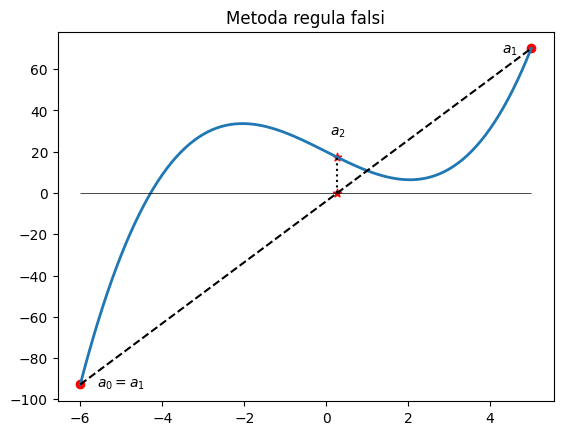

In [354]:
# vykresleni funkce
x = np.linspace(-6, 5, 100)
plt.plot(x, f(x), linewidth=2)
plt.hlines([0], colors=['k'], linewidths=[0.5], linestyles=['-'], xmin=-6, xmax=5)
plt.scatter([a0, b0], [f(a0), f(b0)], c='r')

# vizualizace kroku
c = (a0*f(b0)-f(a0)*b0)/(f(b0)-f(a0))
plt.plot([a0, b0], [f(a0), f(b0)], 'k--')
plt.plot([c, c], [0, f(c)], 'k:')
plt.scatter([c, c], [0, f(c)], c='r', marker='*')
plt.text(4.3,68,'$a_1$')
plt.text(-5.6,-94,'$a_0 = a_1$')
plt.text(0.1,28,'$a_2$')
plt.title('Metoda regula falsi');

**Algoritmus metody regula falsi**

<div style="margin-top: 25px; margin-bottom: 25px; padding-top: 0px; padding-bottom: 0px; padding-left: 0px; padding-right: 0px; border-radius: 4px; border-color: #E0B32C; border-right-width: 1px; border-top-width: 1px; border-bottom-width: 1px; border-left-width: 3px; border-style: solid">
<div style="background: #FFF3CD; color: #000000; padding-left: 20px; padding-top: 10px; padding-bottom: 10px; border-radius: 1px 3px 0px 0px; font-weight: 600">Úkol</div>
<div style="padding-left: 20px; padding-right: 20px; padding-top: 0px; padding-bottom: 0px; border-radius: 0px 0px 3px 3px">
<p>

Implementujte metodu regula falsi doplněním následujícího kódu. Tentokrát metoda **bude** konvergovat.

Do pole `reseni3` uložte vždy řešení a do pole `epsilon3` odpovídající chybu v každé iteraci.
</p>
</div>
</div>

In [ ]:
eps3 = 1e-15
iteraci_max3 = 100

a = -6
a1 = 5

# budeme si prubezne ukladat odhad reseni a chybu odhadu
epsilon3 = np.ones(iteraci_max3) # odhad relativni chyby, tedy delku intervalu <a,b> v jednotlivych krocich
reseni3 = np.zeros(iteraci_max3) # aktualni odhad reseni

i = 0
## DOPLŇTE ##
while (i < iteraci_max3 and eps3 < epsilon3[i-1]):
    a2 = (a*f(a1) - f(a)*a1) / (f(a1)-f(a))
    if (f(a1)*f(a2) < 0):
        a = a1
    epsilon3[i] = np.abs((a2 - a1) / a2)
    a1 = a2
    reseni3[i] = a2
    
    i += 1

iteraci_end3 = i
koren3 = reseni3[i-1] # odhad konecneho reseni
chyba3 = epsilon3[i-1] # odhad konecne chyby

print(koren3, iteraci_end3, chyba3)

-4.282289017870751 39 6.222221919120353e-16


Srovnání výsledků různých metod:

In [356]:
print('Bisekce:     ', koren, f(koren), chyba, iteraci_end)  # predchozi vysledek
print('Sečna:       ', koren2, f(koren2), chyba2, iteraci_end2)
print('Regula-falsi:', koren3, f(koren3), chyba3, iteraci_end3)

Bisekce:      -4.2822890178707524 -2.1316282072803006e-14 5.185184932600293e-16 51
Sečna:        -4.282289017870752 7.105427357601002e-15 8.29629589216047e-16 14
Regula-falsi: -4.282289017870751 3.552713678800501e-14 6.222221919120353e-16 39


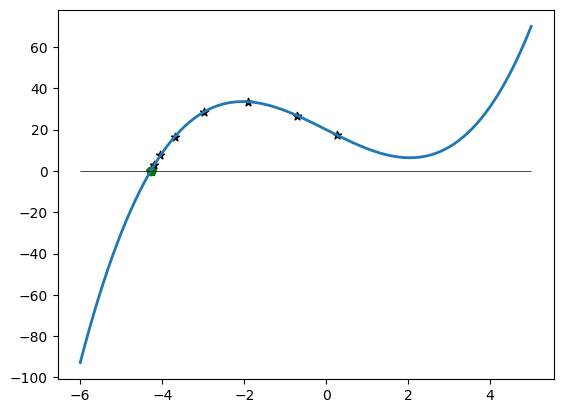

In [357]:
# vykresleni reseni
x = np.linspace(-6, 5, 100)
plt.plot(x, f(x), linewidth=2)
plt.hlines([0], colors=['k'], linewidths=[0.5], linestyles=['-'], xmin=-6, xmax=5)
plt.scatter(reseni3[:iteraci_end3], f(reseni3[:iteraci_end3]), c='k', marker='*')
plt.scatter(koren3, f(koren3), c='g');

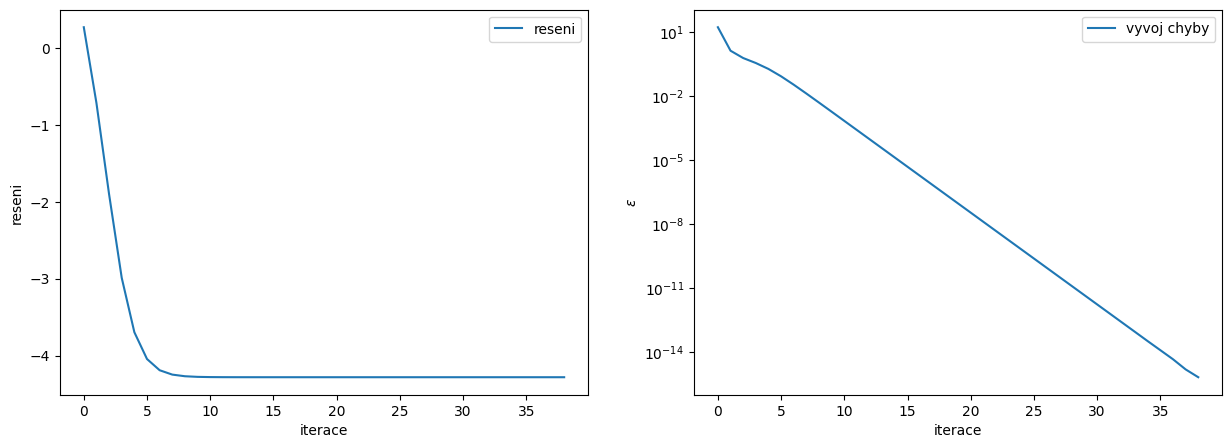

In [358]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

# zobrazime vyvoj reseni v zavislosti na iteracich
ax[0].plot(range(iteraci_end3),reseni3[:iteraci_end3],label='reseni')
ax[0].set_ylabel('reseni')
ax[0].set_xlabel('iterace')
ax[0].legend()

# zobrazime vyvoj chyby v zavislosti na iteracich
ax[1].plot(range(iteraci_end3),epsilon3[:iteraci_end3],label='vyvoj chyby')
ax[1].set_ylabel(r'$\epsilon$')
ax[1].set_xlabel('iterace')
ax[1].set_yscale('log')
ax[1].legend();

### Newton–Raphsonova (tečnová) metoda
- využívá první derivaci zadané funkce (je vhodná, pokud umíme hodnoty derivací rychle počítat)
- Taylorův rozvoj zadané funkce v okolí bodu $x_{i}$:
$
f(x_{i}+\Delta x)=f(x_{i})+\Delta x f'(x_{i})+\dfrac{(\Delta x)^{2}}{2}f''(x_{i})+\dots
$
- vypočítáme $\Delta x = x_{i+1} - x_{i}$ z podmínky $f(x)=0$
- iterační vzorec: $x_{i+1}=x_{i}-\dfrac{f(x_{i})}{f'(x_{i})}$ 
- konvergence **není zaručena**

In [359]:
def f(x):
    return 0.8 * x**3 - 10*x + 20

# analyticky určená derivace
def dxf(x):
    return 2.4 * x**2 - 10

# numericky - pomocí konečné diference
def dxf2(x, h):
    return (f(x+h) - f(x)) / h

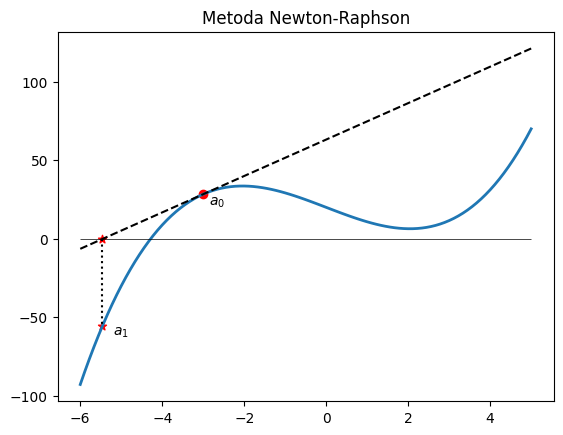

In [360]:
a0 = -3  # volba pocatecniho bodu, ZKUSIT -3, 2.2, 2, 10

a1 = a0 - f(a0) / dxf2(a0, 0.01)

# vykresleni funkce
x = np.linspace(np.min([-6, a1]), np.max([5, a1]), 100)
tecna = f(a0) + dxf(a0) * (x - a0)  # funkce tecny v bode a0

plt.plot(x, f(x), linewidth=2)
plt.hlines([0], colors=['k'], linewidths=[0.5], linestyles=['-'], xmin=np.min([-6, a1]), xmax=np.max([5, a1]))
plt.scatter([a0], [f(a0)], c='r')

# vizualizace kroku
plt.scatter([a1, a1], [0, f(a1)], c='r', marker='*')
plt.plot(x, tecna, 'k--')
plt.plot([a1, a1], [0, f(a1)], 'k:')
plt.text(a0*0.95,f(a0)*0.75,'$a_0$')
plt.text(a1*0.95,f(a1)*1.1,'$a_1$')
plt.title('Metoda Newton-Raphson');

**Algoritmus Newton–Raphsonovy metody**

<div style="margin-top: 25px; margin-bottom: 25px; padding-top: 0px; padding-bottom: 0px; padding-left: 0px; padding-right: 0px; border-radius: 4px; border-color: #E0B32C; border-right-width: 1px; border-top-width: 1px; border-bottom-width: 1px; border-left-width: 3px; border-style: solid">
<div style="background: #FFF3CD; color: #000000; padding-left: 20px; padding-top: 10px; padding-bottom: 10px; border-radius: 1px 3px 0px 0px; font-weight: 600">Úkol</div>
<div style="padding-left: 20px; padding-right: 20px; padding-top: 0px; padding-bottom: 0px; border-radius: 0px 0px 3px 3px">
<p>

Implementujte Newton–Raphsonovu metodu doplněním následujícího kódu. Je třeba vhodně zvolit počáteční odhad, aby metoda **konvergovala**! Pro jaké počáteční hodnoty metoda konverguje? Pro které ne?
</p>
</div>
</div>

In [ ]:
eps4 = 1e-15
iteraci_max4 = 100
a0 = -3 # ZKUSIT -3, 2.2, 2, 10

# budeme si prubezne ukladat odhad reseni a chybu odhadu
epsilon4 = np.ones(iteraci_max4) # odhad relativni chyby, tedy delku intervalu <a,b> v jednotlivych krocich
reseni4 = np.zeros(iteraci_max4) # aktualni odhad reseni

i = 0
## DOPLŇTE ##
while (i < iteraci_max4 and eps4 < epsilon4[i-1]):
    a1 = a0 - f(a0) / dxf2(a0, 0.01)
    epsilon4[i] = np.abs((a0 - a1) / a1)
    a0 = a1
    reseni4[i] = a1
    
    i += 1

iteraci_end4 = i
koren4 = reseni4[i-1] # odhad konecneho reseni
chyba4 = epsilon4[i-1] # odhad konecne chyby

print(koren4, iteraci_end4, chyba4)

-4.282289017870752 10 0.0


Porovnání s výsledkem funkce `fsolve()` z knihovny SciPy:

In [362]:
koren_SP2 = fsolve(f, a0)

Srovnání výsledků různých metod:

In [363]:
print('Bisekce:      ', koren, f(koren), chyba)  # predchozi vysledek
print('Sečna:        ', koren2, f(koren2), chyba2)
print('Regula-falsi: ', koren3, f(koren3), chyba3)
print('Newton-Raphon:', koren4, f(koren4), chyba4)
print('fsolve():     ', koren_SP2, f(koren_SP2))

Bisekce:       -4.2822890178707524 -2.1316282072803006e-14 5.185184932600293e-16
Sečna:         -4.282289017870752 7.105427357601002e-15 8.29629589216047e-16
Regula-falsi:  -4.282289017870751 3.552713678800501e-14 6.222221919120353e-16
Newton-Raphon: -4.282289017870752 7.105427357601002e-15 0.0
fsolve():      [-4.28228902] [7.10542736e-15]


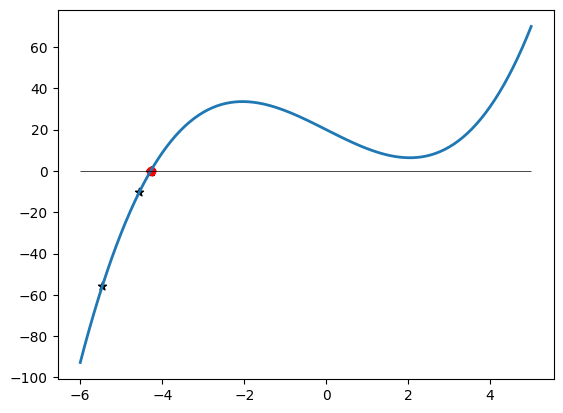

In [364]:
# vykresleni reseni
xmin = np.min([-6, np.min(reseni4[:iteraci_end4])])
xmax = np.max([5, np.max(reseni4[:iteraci_end4])])

x = np.linspace(xmin, xmax, 100)
plt.plot(x, f(x), linewidth=2)
plt.hlines([0], colors=['k'], linewidths=[0.5], linestyles=['-'], xmin=xmin, xmax=xmax)
plt.scatter(reseni4[:iteraci_end4], f(reseni4[:iteraci_end4]), c='k', marker='*')
plt.scatter(koren4, f(koren4), c='r');

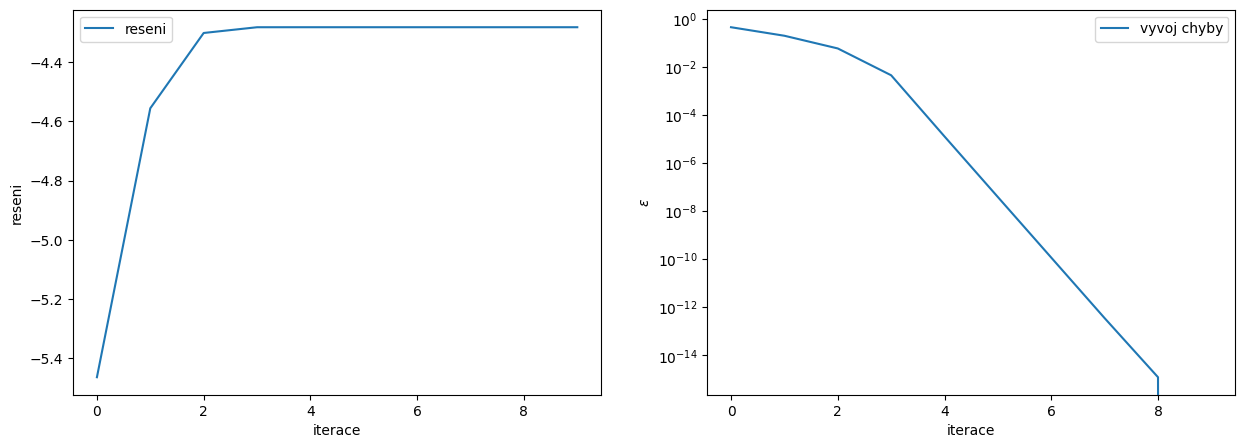

In [365]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

# zobrazime vyvoj reseni v zavislosti na iteracich
ax[0].plot(range(iteraci_end4),reseni4[:iteraci_end4],label='reseni')
ax[0].set_ylabel('reseni')
ax[0].set_xlabel('iterace')
ax[0].legend()

# zobrazime vyvoj chyby v zavislosti na iteracich
ax[1].plot(range(iteraci_end4),epsilon4[:iteraci_end4],label='vyvoj chyby')
ax[1].set_ylabel(r'$\epsilon$')
ax[1].set_xlabel('iterace')
ax[1].set_yscale('log')
ax[1].legend();

### Srovnání konvergencí

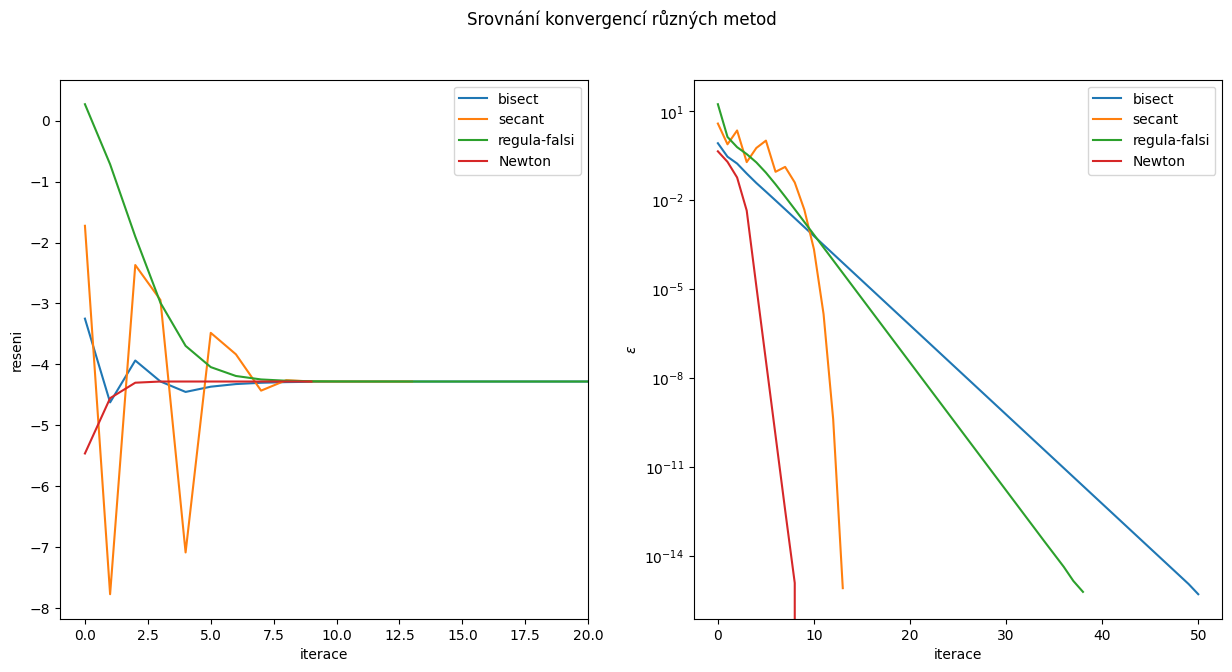

In [366]:
fig, ax = plt.subplots(1,2,figsize=(15,7))
fig.suptitle('Srovnání konvergencí různých metod')

# zobrazime vyvoj reseni v zavislosti na iteracich
ax[0].plot(range(iteraci_end),reseni[:iteraci_end],label='bisect')
ax[0].plot(range(iteraci_end2),reseni2[:iteraci_end2],label='secant')
ax[0].plot(range(iteraci_end3),reseni3[:iteraci_end3],label='regula-falsi')
ax[0].plot(range(iteraci_end4),reseni4[:iteraci_end4],label='Newton')
ax[0].set_xlim([-1, 20])
ax[0].set_ylabel('reseni')
ax[0].set_xlabel('iterace')
ax[0].legend()

# zobrazime vyvoj chyby v zavislosti na iteracich
ax[1].plot(range(iteraci_end),epsilon[:iteraci_end],label='bisect')
ax[1].plot(range(iteraci_end2),epsilon2[:iteraci_end2],label='secant')
ax[1].plot(range(iteraci_end3),epsilon3[:iteraci_end3],label='regula-falsi')
ax[1].plot(range(iteraci_end4),epsilon4[:iteraci_end4],label='Newton')
ax[1].set_yscale('log')
ax[1].set_ylabel(r'$\epsilon$')
ax[1].set_xlabel('iterace')
ax[1].legend();

## Soustavy nelineárních rovnic

- řešíme soustavu $\vec{f}(\vec{x})=\vec{0}$
- přepíšeme ji do tvaru:

$$
f_{1}(x_{1},x_{2},\dots,x_{n})=0,
$$
$$
f_{2}(x_{1},x_{2},\dots,x_{n})=0,
$$
$$
f_{3}(x_{1},x_{2},\dots,x_{n})=0,
$$
$$
\vdots
$$
$$
f_{n}(x_{1},x_{2},\dots,x_{n})=0.
$$

(newton2D)=

### Newton-Raphsonova metoda 2D

- přesné řešení $\vec{\xi}$ vyjádříme ve tvaru $\vec{\xi}=\vec{x}+\delta\vec{x}$
- hodnotu funkce v bodě $\vec{\xi}$ vyjádříme pomocí Taylorovy věty:
$
f_{i}(\vec{x}+\delta\vec{x})=f_{i}(\vec{x})+\sum_{j=1}^{n}\dfrac{\partial f_{i}}{\partial x_{j}}\delta x_{j}+\mathcal{O}(\delta \vec{x}^{2})
$
- zanedbáním $\mathcal{O}(\delta \vec{x}^{2})$ získáme:
$
f_{i}(\vec{x}+\delta\vec{x})=f_{i}(\vec{x})+\sum_{j=1}^{n}\dfrac{\partial f_{i}}{\partial x_{j}}\delta x_{j}=0
$
- řešíme tedy soustavu $n$ lineárních rovnic s neznámou $\delta \vec{x}$, označme $\mathbb{J}_{i,j} = \dfrac{\partial f_{i}}{\partial x_{j}}$
- dostaneme soustavu: $\mathbb{J} \cdot \delta \vec{x} = -\vec{f}$
- iterační vztah pro funkci $n$ proměnných: $x_{i}^{(k+1)}=x_{i}^{(k)} - \sum_{j=1}^{n}\mathbb{J}_{i,j}^{-1} f_{j}$

## Zápočtová úloha

<div style="margin-top: 25px; margin-bottom: 25px; padding-top: 0px; padding-bottom: 0px; padding-left: 0px; padding-right: 0px; border-radius: 4px; border-color: #E0B32C; border-right-width: 1px; border-top-width: 1px; border-bottom-width: 1px; border-left-width: 3px; border-style: solid">
<div style="background: #FFF3CD; color: #000000; padding-left: 20px; padding-top: 10px; padding-bottom: 10px; border-radius: 1px 3px 0px 0px; font-weight: 600">Úkol - zápočet 6</div>
<div style="padding-left: 20px; padding-right: 20px; padding-top: 0px; padding-bottom: 0px; border-radius: 0px 0px 3px 3px">
<p>

[ZDE](ukol6)
</p>
</div>
</div>